# **CodSoft | Data Science | Internship**

---
## **Problem Statement**

## **Task 2 | MOVIE RATING PREDICTION WITH PYTHON**
 - Build a model that predicts the rating of a movie based on
  features like genre, director, and actors. You can use regression techniques to tackle this problem.

 - The goal is to analyze historical movie data and develop  a model that accurately estimates the rating given to a movie by users or critics.

 - Movie Rating Prediction project enables you to explore  data analysis, preprocessing, feature engineering, and  machine learning modeling techniques. It provides insights  into the factors that influence movie ratings and allows  you to build a model that can estimate the ratings of  movies accurately.

## **Import Necessary Libraries**

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## **Load the Movie Rating Prediction DataSet**

In [92]:
df = pd.read_csv("IMDbMoviesIndia.csv", encoding = ("ISO-8859-1"), low_memory = False)

In [93]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [94]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [95]:
df.shape

(15509, 10)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [97]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### **Check Missing Values in the Dataset**

In [98]:
print("Any missing value: ",df.isnull().values.any())

Any missing value:  True


In [99]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

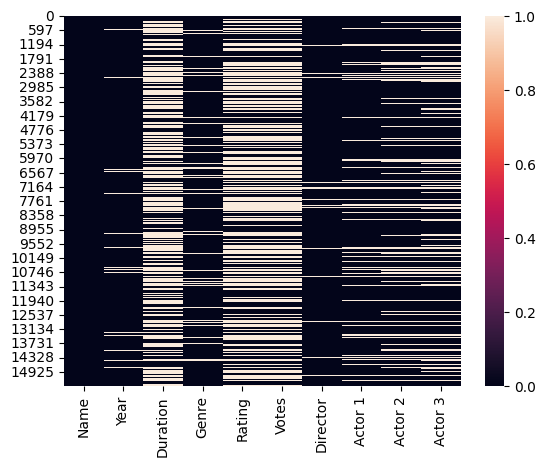

In [100]:
sns.heatmap(df.isnull())
plt.show()

In [101]:
per_missing = (df.isnull().sum() * 100 / len(df)).round()
per_missing

Name         0.0
Year         3.0
Duration    53.0
Genre       12.0
Rating      49.0
Votes       49.0
Director     3.0
Actor 1     10.0
Actor 2     15.0
Actor 3     20.0
dtype: float64

### Drop All the Missing Values

In [102]:
df.dropna(axis= 0, inplace= True)

In [103]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [104]:
df.shape

(5659, 10)

### Check for Duplicate Data

In [105]:
dupl_df = df.duplicated().any()
print("Are there any duplicate values?", dupl_df)

Are there any duplicate values? False


In [106]:
df = df.drop_duplicates()
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [107]:
df1 = pd.DataFrame(df)
# Convert the 'Price' column to float
df1['Votes'] = df1['Votes'].str.replace('[^\d.]', '', regex=True).astype(float)
df1.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [108]:
df1 = pd.DataFrame(df)
# Convert the 'Price' column to float
df1['Year'] = df1['Year'].str.replace('[^\d.]', '', regex=True).astype('Int64')
df1.dtypes

Name         object
Year          Int64
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [109]:
df1 = pd.DataFrame(df)
# Convert the 'Price' column to float
df1['Duration'] = df1['Duration'].str.replace('[^\d.]', '', regex=True).astype(float)
df1.dtypes

Name         object
Year          Int64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [110]:
df.describe()

,Year,Duration,Rating,Votes
count,5659.0,5659.000000,5659.000000,5659.000000
mean,1996.24757,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.0,21.000000,1.100000,5.000000
25%,1983.0,119.000000,5.000000,30.000000
50%,2002.0,135.000000,6.100000,131.000000
75%,2013.0,150.000000,6.900000,922.500000
max,2021.0,321.000000,10.000000,591417.000000


In [111]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### **Display Title of the Movie Having Runtime >= 120 Minutes**

In [112]:
df[df["Duration"] >= 120] ["Name"]

5        ...Aur Pyaar Ho Gaya
6                   ...Yahaan
11       1:13:7 Ek Tera Saath
12                   100 Days
13                  100% Love
                 ...         
15492                   Zorro
15494                Zubeidaa
15503         Zulm Ki Zanjeer
15505                   Zulmi
15508            Zulm-O-Sitam
Name: Name, Length: 4205, dtype: object

### **In Which Year There Was The Highest Average Voting?**

In [113]:
df.groupby("Year")["Votes"].mean().sort_values(ascending=False)

Year
2012    9900.971429
2007    7212.017094
2016    6780.601156
2009    5938.805085
2020    5819.257143
           ...     
1932      12.000000
1933      12.000000
1938      10.600000
1939       9.500000
1934       8.500000
Name: Votes, Length: 91, dtype: float64

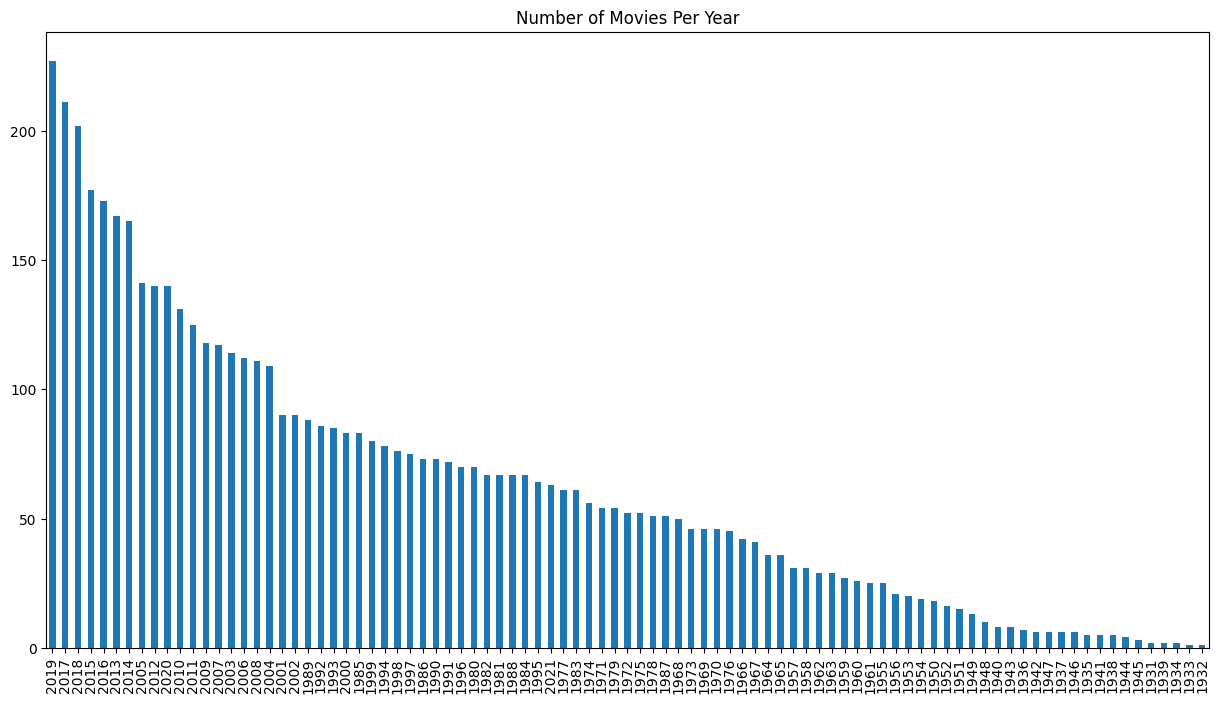

In [114]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')
plt.show()

### **Find The Average Rating For Each Director**

In [115]:
df.groupby("Director")["Rating"].mean()

Director
A. Bhimsingh      6.785714
A. Jagannathan    5.833333
A. Majid          5.700000
A. Muthu          3.000000
A. Salaam         5.575000
                    ...   
Zia Sarhadi       6.366667
Ziaullah Khan     5.600000
Zoya Akhtar       6.800000
Zubair Khan       5.400000
Zunaid Memon      6.400000
Name: Rating, Length: 2431, dtype: float64

### **Display Top 10 Lengthy Movies Title and Runtime**

In [116]:
top10 = df.nlargest(10, "Duration")[["Name", "Duration"]].set_index("Name")
top10

,Duration
Name,
Gangs of Wasseypur,321.0
Athidhi,300.0
LOC: Kargil,255.0
Vidhyaarthi: The Power of Students,250.0
Janwar,247.0
Aasma: The Sky Is the Limit,240.0
Veera,240.0
Vivekananda,240.0
Sangam,238.0


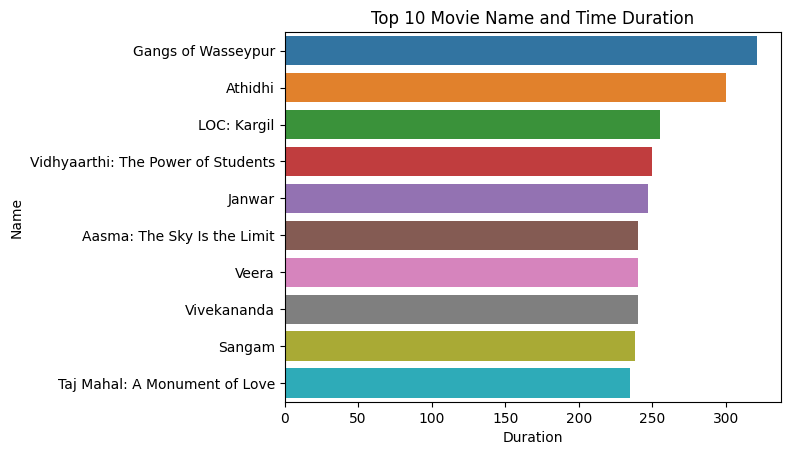

In [117]:
sns.barplot(x = "Duration", y = top10.index,data = top10)
plt.title("Top 10 Movie Name and Time Duration")
plt.show()

### **Display Number of Movies Per Year**

In [118]:
df["Year"].value_counts()

2019    227
2017    211
2018    202
2015    177
2016    173
       ... 
1931      2
1939      2
1934      2
1933      1
1932      1
Name: Year, Length: 91, dtype: Int64

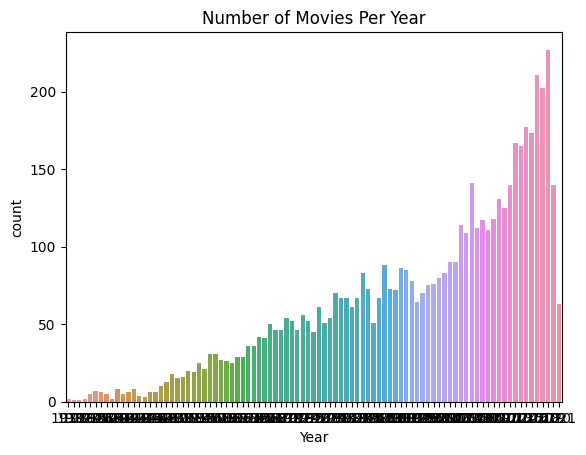

In [119]:
sns.countplot(x = "Year", data = df)
plt.title("Number of Movies Per Year")
plt.show()

### **Now let's plot the correlation matrix of our data with a heatmap.**

C:\Users\irtiz\AppData\Local\Temp\ipykernel_1236\2698673731.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")


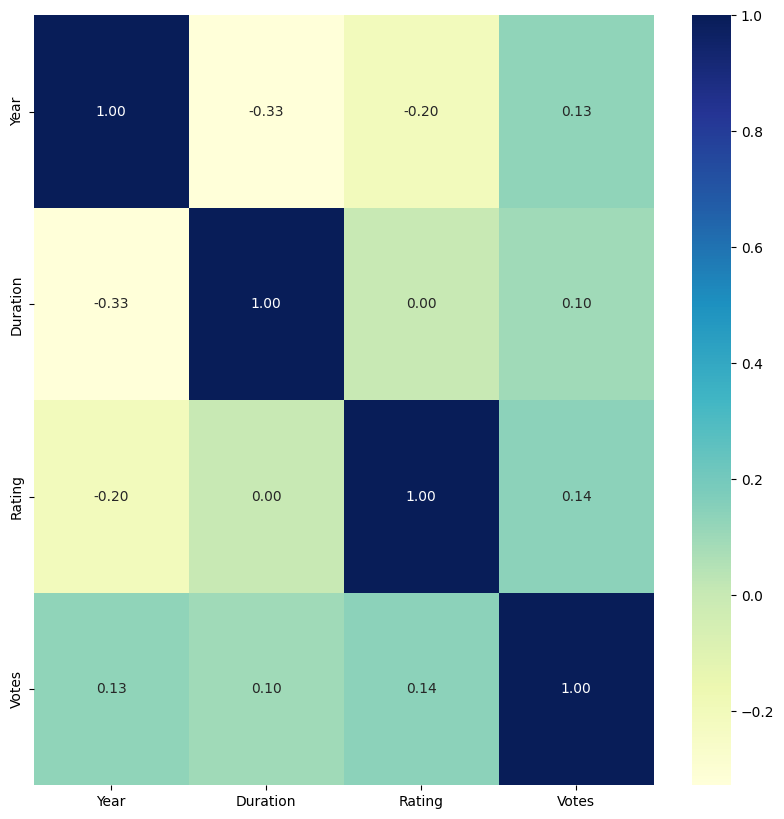

In [120]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

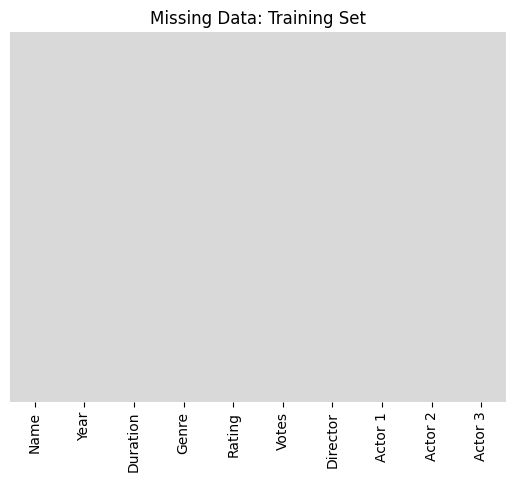

In [121]:
# Missing Value | Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [122]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [123]:
df.drop(['Name','Genre'], axis = 1, inplace = True)
df.drop(['Actor 1','Actor 2'], axis = 1, inplace = True)
df.drop(['Actor 3','Director'], axis = 1, inplace = True)

In [124]:
df.head()

,Year,Duration,Rating,Votes
1,2019,109.0,7.0,8.0
3,2019,110.0,4.4,35.0
5,1997,147.0,4.7,827.0
6,2005,142.0,7.4,1086.0
8,2012,82.0,5.6,326.0


### **Split the data into training and testing sets**

In [125]:
# Split the data into training and testing sets
X = df.drop(['Rating'], axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (4527, 3)
Shape of y_train: (4527,)
Shape of X_test: (1132, 3)
Shape of y_test: (1132,)


### **Train a Linear Regression Model**

In [127]:
# Model Selection
model = LinearRegression()
# Model Training
model.fit(X_train, y_train)

LinearRegression()

### **Model Evaluation**

In [128]:
# Model Evaluation
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.3066487776555735


In [129]:
# Make Predictions
y_pred = model.predict(X_test)

In [130]:
print(y_pred)
print(y_pred.shape)

[5.80502417 5.75971063 5.9313535  ... 5.71765087 5.60413126 6.52075924]
(1132,)


### **Take new user input for prediction**


In [131]:
# Take new user input for prediction

new_input = pd.DataFrame({
    'Year': [2023],          # Replace with the desired year
    'Duration': [222],       # Replace with the desired duration in minutes
    'Votes': [23445],        # Replace with the desired number of votes
})


predicted_rating = model.predict(new_input)

print("Predicted Rating:", predicted_rating)

Predicted Rating: [5.22706072]
